# Scraping books

In [ ]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [ ]:
def fetch_page(page):
    print(f"scraping page {page + 1}")
    response = requests.get(
        f'http://books.toscrape.com/catalogue/page-{page + 1}.html',
        headers={"Accept-Language":"en-US"}
    )
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [ ]:
ratings = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}

In [ ]:
def add_books_to_dict(soup, dict):
    for book_html in soup.find_all(class_="product_pod"):
        dict['Title'].append(book_html.find("h3").find("a").string)
        dict['Price'].append(float(book_html.find(class_="price_color").string.strip('£')))
        stars_html = book_html.find(class_="star-rating")
        dict['Rating'].append(ratings.get(stars_html.attrs['class'][1], 0))

In [ ]:
books_dict = { 'Title': [], 'Price': [], 'Rating': [] }

In [ ]:
def create_books_df(max_page):
    books_dict = { 'Title': [], 'Price': [], 'Rating': [] }
    for page in range(max_page):
        soup = fetch_page(page)
        add_books_to_dict(soup, books_dict)
    return pd.DataFrame.from_dict(books_dict)

In [ ]:
books_df = create_books_df(50)
books_df.shape

scraping page 1
scraping page 2
scraping page 3
scraping page 4
scraping page 5
scraping page 6
scraping page 7
scraping page 8
scraping page 9
scraping page 10
scraping page 11
scraping page 12
scraping page 13
scraping page 14
scraping page 15
scraping page 16
scraping page 17
scraping page 18
scraping page 19
scraping page 20
scraping page 21
scraping page 22
scraping page 23
scraping page 24
scraping page 25
scraping page 26
scraping page 27
scraping page 28
scraping page 29
scraping page 30
scraping page 31
scraping page 32
scraping page 33
scraping page 34
scraping page 35
scraping page 36
scraping page 37
scraping page 38
scraping page 39
scraping page 40
scraping page 41
scraping page 42
scraping page 43
scraping page 44
scraping page 45
scraping page 46
scraping page 47
scraping page 48
scraping page 49
scraping page 50


(1000, 3)

In [ ]:
books_df.head()

,Title,Price,Rating
0,A Light in the ...,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History ...,54.23,5


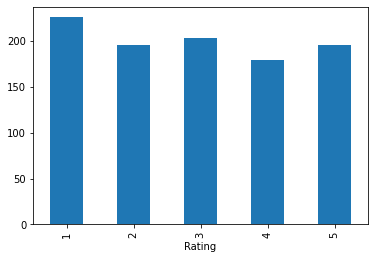

In [ ]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar")

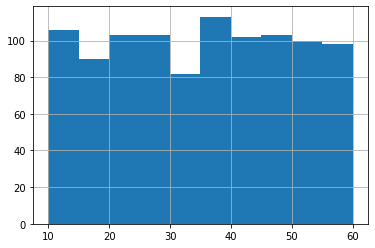

In [ ]:
books_df['Price'].hist()

In [ ]:
books_df.to_csv("books.csv")
#all_books_df.to_excel('books.xlsx', sheet_name='Books')

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/02-Data-Toolkit/02-Data-Sourcing/02-Scraping
plugins: anyio-2.0.2
collecting ... collected 6 items

tests/test_books.py::TestBooks::test_books_df_columns_name PASSED        [ 16%]
tests/test_books.py::TestBooks::test_books_df_columns_size PASSED        [ 33%]
tests/test_books.py::TestBooks::test_books_dict_id_defined PASSED        [ 50%]
tests/test_books.py::TestBooks::test_first_book_price PASSED             [ 66%]
tests/test_books.py::TestBooks::test_first_book_rating PASSED            [ 83%]
tests/test_books.py::TestBooks::test_first_book_title PASSED             [100%]

============================== 6 passed in 0.28s ===============================


💯 You can commit your code:

git add 